KMENAS WITH SCIKITLEARN

In [60]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.cluster import KMeans
style.use('ggplot')

In [61]:
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8],
              [8, 8],
              [1, 0.6],
              [9, 11]])

In [64]:
#plt.scatter(X[:, 0],X[:, 1], s=50, linewidths = 5, zorder = 10)
#plt.show()

In [13]:
clf = KMeans(n_clusters=2)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
centroids = clf.cluster_centers_
labels = clf.labels_

In [15]:
print(centroids)
print(labels)

[[1.16666667 1.46666667]
 [7.33333333 9.        ]]
[0 0 1 1 0 1]


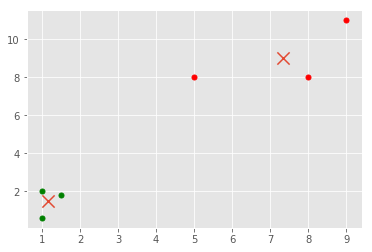

In [16]:
colors = ["g.","r.","c.","y."]
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
plt.show()

HANDLING NON-NUMERIC DATA WITH TITANICE DATASET

-------------------------------------TITANICE DATASET------------------------------------

In [119]:
#https://pythonprogramming.net/static/downloads/machine-learning-data/titanic.xls
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing, cross_validation
import pandas as pd

In [120]:
df = pd.read_excel('titanic.xls')
#print(df.head())
#df.drop(['body','name'], 1, inplace=True)
df.convert_objects(convert_numeric=True)
df.fillna(0, inplace=True)
print(df.head())

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    0.0   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    0.0   
2   2.0000      1      2  113781  151.5500  C22 C26        S    0    0.0   
3  30.0000      1      2  113781  151.5500  C22 C26        S    0  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S    0    0.0   

                         home.dest  
0                     St 

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


In [121]:
def handle_non_numerical_data(df):
    columns = df.columns.values #['pclass' 'survived' 'sex' .....' 'fare' 'cabin' 'embarked' 'boat' 'home.dest']
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

In [122]:
df = handle_non_numerical_data(df)
print(df.head())

   pclass  survived  name  sex      age  sibsp  parch  ticket      fare  \
0       1         1   956    0  29.0000      0      0     733  211.3375   
1       1         1   421    1   0.9167      1      2     533  151.5500   
2       1         0   677    0   2.0000      1      2     533  151.5500   
3       1         0   386    1  30.0000      1      2     533  151.5500   
4       1         0   344    0  25.0000      1      2     533  151.5500   

   cabin  embarked  boat   body  home.dest  
0    126         1     1    0.0        367  
1    141         1     9    0.0        216  
2    141         1     0    0.0        216  
3    141         1     0  135.0        216  
4    141         1     0    0.0        216  


In [123]:
c=([100,100],[0,0],[-100,-100])
n = preprocessing.scale(c)
print(n)

[[ 1.22474487  1.22474487]
 [ 0.          0.        ]
 [-1.22474487 -1.22474487]]


In [124]:
df.drop(['sex','boat','name','home.dest','sibsp'], 1, inplace=True)
X = np.array(df.drop(['survived'], 1).astype(float))
#print(X)
X = preprocessing.scale(X)
#print(X)
y = np.array(df['survived'])


clf = KMeans(n_clusters=2)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [125]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.6890756302521008


In [65]:
a = np.array([1,4,6,7,8])

In [66]:
a

array([1, 4, 6, 7, 8])

In [67]:
a.reshape(-1,len(a))

array([[1, 4, 6, 7, 8]])